In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras

%matplotlib inline

In [20]:
df = pd.read_csv('bank_customer_churn.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [21]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis='columns', inplace=True)

In [22]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [23]:
# get dummies for Geography and Gender
df = pd.get_dummies(df, ['Geography', 'Gender'])
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [24]:
cols_to_scale = ['CreditScore', 'Tenure', 'Balance',
                 'EstimatedSalary', 'Age', 'NumOfProducts']
scalar = MinMaxScaler()

df[cols_to_scale] = scalar.fit_transform(df[cols_to_scale])
df.sample(5)


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
1193,0.026,0.135135,0.6,0.582302,0.666667,1,0,0.503066,1,0,0,1,1,0
3329,1.000,0.337838,0.3,0.000000,0.333333,0,0,0.012272,0,1,0,0,1,0
8739,0.336,0.554054,0.5,0.553102,0.000000,0,1,0.619361,0,1,0,0,0,1
7164,0.860,0.216216,0.5,0.375087,0.333333,1,0,0.886203,0,0,1,0,0,1
5258,0.756,0.270270,0.1,0.462079,0.000000,1,1,0.695304,0,1,0,0,0,1


In [25]:
# print unique values
for col in df.columns:
    print(print(col, ':', df[col].unique()))


CreditScore : [0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0.69  0.484 0.

In [26]:
# split the data into test and train set
X_train, X_test, y_train, y_test = train_test_split(df.drop('Exited', axis='columns'), df['Exited'], test_size=0.2, random_state=42)

In [41]:
# construct a neural network 
model = keras.Sequential()
model.add(keras.layers.Dense(20, activation='relu', input_shape=(X_train.shape[1],)))
model.add(keras.layers.Dense(15, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)


Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5145 - accuracy: 0.7700
Epoch 2/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4734 - accuracy: 0.7965
Epoch 3/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4538 - accuracy: 0.8046
Epoch 4/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4398 - accuracy: 0.8098
Epoch 5/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4321 - accuracy: 0.8144
Epoch 6/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4252 - accuracy: 0.8159
Epoch 7/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4206 - accuracy: 0.8200
Epoch 8/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4124 - accuracy: 0.8242
Epoch 9/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4040 - accuracy: 0.8266
Epoch 10/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3924 - accura

In [42]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 3ms/step - loss: 0.3409 - accuracy: 0.8615


[0.3408965766429901, 0.8615000247955322]

In [43]:
y_pred = model.predict(X_test)
y_pred

array([[0.05439129],
       [0.01742914],
       [0.10114634],
       ...,
       [0.7505388 ],
       [0.11276445],
       [0.30539173]], dtype=float32)

In [44]:
# convert values > 0.5 to 1 and < 0.5 to 0 for y_pred
y_pred = np.where(y_pred > 0.5, 1, 0)
y_pred


array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [45]:
y_pred = y_pred.reshape(y_pred.shape[0])

y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92      1607
           1       0.71      0.49      0.58       393

    accuracy                           0.86      2000
   macro avg       0.80      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



Text(69.0, 0.5, 'Actual')

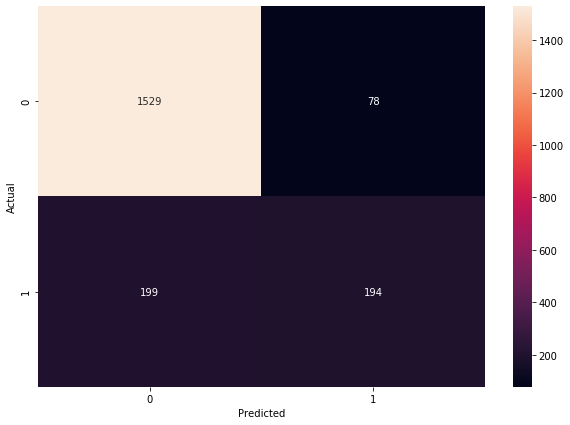

In [47]:
# construct confusion matrix with seaborn heatmap
cm = tf.math.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
